In [3]:
import os 
import pathlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

from google.colab import files
from sklearn.metrics import classification_report,confusion_matrix

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saha2060","key":"00e69d0cd67ff1d110bbf77c42af5fa8"}'}

In [5]:
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [6]:
!kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 90% 187M/207M [00:03<00:00, 30.6MB/s]
100% 207M/207M [00:03<00:00, 54.5MB/s]


In [7]:
!unzip \*.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [8]:
def view_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+ random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape {img.shape}")
    
    return img

['49.jpg']
image shape (276, 182, 3)


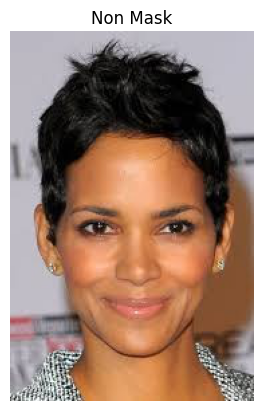

In [9]:
img = view_image("/content/New Masks Dataset/Train/","Non Mask")

['0559.jpg']
image shape (1080, 1080, 3)


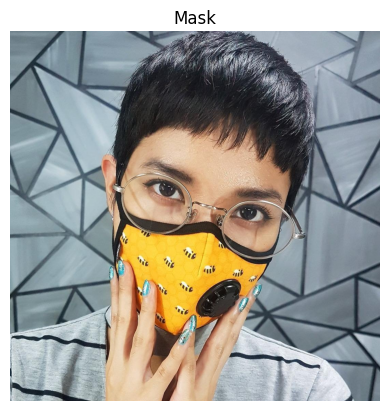

In [10]:
img = view_image("/content/New Masks Dataset/Train/","Mask")

In [11]:
data=[]
labels=[]
no_mask=os.listdir("/content/New Masks Dataset/Train/Non Mask/")
for a in no_mask:

    image = cv2.imread("/content/New Masks Dataset/Train/Non Mask/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)

no_mask=os.listdir("/content/New Masks Dataset/Test/Non Mask/")
for a in no_mask:

    image = cv2.imread("/content/New Masks Dataset/Test/Non Mask/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)

In [12]:
mask=os.listdir("/content/New Masks Dataset/Train/Mask/")
for a in mask:

    image = cv2.imread("/content/New Masks Dataset/Train/Mask/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(1)


mask=os.listdir("/content/New Masks Dataset/Test/Mask/")
for a in mask:

    image = cv2.imread("/content/New Masks Dataset/Test/Mask/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(1)

In [13]:
data = np.array(data) / 255.0
labels = np.array(labels)

In [14]:
data.shape

(700, 224, 224, 3)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=42,shuffle=True,
                                                    stratify = labels)

In [16]:
base_model = tf.keras.applications.MobileNet(input_shape=[224,224,3], weights = "imagenet", include_top=False)

base_model.trainable = False

# for layer in base_model.layers[30:]:
#   layer.trainable = False
    

model = Flatten()(base_model.output)
model = Dense(units=256, activation="relu")(model)
model = Dense(units=64, activation="relu")(model)
prediction_layer = Dense(units=1, activation="sigmoid")(model)

model = Model(inputs = base_model.input, outputs = prediction_layer)
model.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
model.fit(X_train, y_train, epochs=15,validation_split= 0.1, batch_size=32)

Epoch 1/15
18/18 [==============================] - 35s 2s/step - loss: 0.8610 - accuracy: 0.8713 - val_loss: 0.0319 - val_accuracy: 1.0000
Epoch 2/15
18/18 [==============================] - 32s 2s/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0188 - val_accuracy: 1.0000
Epoch 3/15
18/18 [==============================] - 38s 2s/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 4/15
18/18 [==============================] - 33s 2s/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 5/15
18/18 [==============================] - 33s 2s/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 6/15
18/18 [==============================] - 35s 2s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 7/15
18/18 [==============================] - 34s 2s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 8/15
18/18 [==

In [ ]:
predictions = model.predict(X_test)

predict=[]

for i in range(len(predictions)):
    if predictions[i][0]>0.5:
        predict.append(1)
    else:
        predict.append(0)

3/3 [==============================] - 4s 771ms/step


In [2]:
input_image_path = input('Path of the image to be predicted: ')
import cv2
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label =  np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  
  print('The person in the image is wearing a mask')

else:
  print('The person in the image is not wearing a mask')

Path of the image to be predicted: 2070.jpg


NameError: ignored

In [ ]:
pd.DataFrame(confusion_matrix(y_test, predict), columns= ["No Mask", "Mask"], index = ["No Mask", "Mask"])

,No Mask,Mask
No Mask,35,0
Mask,0,35


In [ ]:
model_name = "/content/mask_detection_best.h5"
tf.keras.models.save_model(model, model_name)

In [ ]:
import cv2
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

%config Completer.use_jedi = False

In [ ]:
face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
mask_detection = tf.keras.models.load_model("mask_detection_best.h5")

In [ ]:
text_mask = "Mask On"
text_no_mask = "Mask Off"
font = cv2.FONT_HERSHEY_SIMPLEX
scale = 0.8

In [ ]:
def predict(image):
    
    face_frame = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    face_frame = cv2.resize(face_frame, (224, 224))
    face_frame = img_to_array(face_frame)
    face_frame = np.expand_dims(face_frame, axis=0)
    face_frame =  preprocess_input(face_frame)
    prediction = mask_detection.predict(face_frame)
    
    return prediction[0][0]

In [ ]:
def detector(gray_image, frame):
    
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5)
    
    for (x,y,w,h) in faces:

        roi_color = frame[y:y+h, x:x+w]
        mask = predict(roi_color)

        
        if mask > 0.5:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), 2)
            cv2.putText(frame, text =text_mask, org =(x+50,y-100), fontFace =font, fontScale = scale, color =(0,255,0),
            thickness = 2)
        
        elif mask<=0.5:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255), 2)
            cv2.putText(frame, text =text_no_mask, org =(x+50,y-100), fontFace =font, fontScale = scale , color =(0,0,255),
            thickness = 2)
            
    return frame

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)
 
while(True):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    cv2.imshow('frame', gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

error: ignored